| **Inicio** | **atrás 11** | **Siguiente 13** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./11.Perceptron.ipynb)| [⏩](./13.Arboles%20_Decision.ipynb)|

# **12. Una métrica esencial para clasificadores: Área Bajo la Curva ROC (Receiver Operating Characteristic)**

## **Introducción**

El Área Bajo la Curva ROC (Receiver Operating Characteristic) es una medida de la capacidad de un modelo de clasificación para distinguir entre clases positivas y negativas. En términos simples, la `AUC-ROC` mide la habilidad de un modelo para predecir correctamente la clase positiva en comparación con la clase negativa. La curva ROC representa la relación entre la tasa de verdaderos positivos `(Sensibilidad)` y la tasa de falsos positivos `(1 - Especificidad)` a lo largo de un rango de umbrales de clasificación. El área bajo esta curva `(AUC-ROC)` es una medida numérica de la calidad del modelo, donde una puntuación de `1.0` indica una clasificación perfecta y `0.5` indica una clasificación aleatoria.

![ROC](../imagenes%20Machine_Learning/Curva_ROC.svg.png "ROC")

A continuación, se presenta un ejemplo de cómo calcular y graficar la curva ROC y el área bajo la curva `(AUC)` utilizando Python y las bibliotecas `scikit-learn` y `matplotlib`. Para este ejemplo, utilizaremos el conjunto de datos de cáncer de mama de Wisconsin.

Primero, cargamos los datos y dividimos en conjuntos de entrenamiento y prueba:

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Cargamos el conjunto de datos
data = load_breast_cancer()

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


Luego, entrenamos un modelo de regresión logística y obtenemos las probabilidades de predicción para los datos de prueba:

In [2]:
from sklearn.linear_model import LogisticRegression

# Creamos y entrenamos un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Obtenemos las probabilidades de predicción para los datos de prueba
probs = model.predict_proba(X_test)[:, 1]


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A continuación, utilizamos la función ```roc_curve``` de scikit-learn para calcular la tasa de verdaderos positivos `(TPR)`, la tasa de falsos positivos `(FPR)` y los umbrales para diferentes valores de probabilidad. Luego, graficamos la curva `ROC` utilizando la biblioteca `matplotlib`:

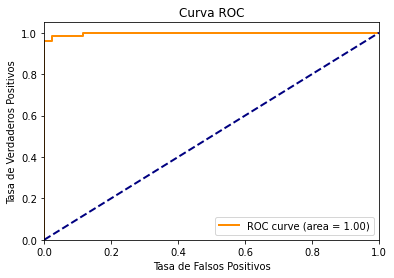

In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


La `AUC` para este modelo es `0.99`, lo que indica que el modelo tiene un excelente poder de discriminación.

## **Verdaderos Positivos/Negativos y Falsos Positivos/Negativos**

Los Verdaderos Positivos `(VP)` y Verdaderos Negativos `(VN)` son los casos en los que el modelo ha predicho correctamente la clase positiva y negativa, respectivamente.

Los Falsos Positivos `(FP)` y Falsos Negativos `(FN)` son los casos en los que el modelo ha predicho incorrectamente la clase positiva y negativa, respectivamente.

En el contexto de la evaluación de un modelo de clasificación, se usan estas cuatro medidas para calcular la precisión del modelo, la sensibilidad, la especificidad y la puntuación `F1`.

La precisión mide la proporción de casos positivos predichos correctamente en relación con el número total de casos positivos predichos.

La sensibilidad mide la proporción de casos positivos reales que se han identificado correctamente en relación con el número total de casos positivos.

La especificidad mide la proporción de casos negativos reales que se han identificado correctamente en relación con el número total de casos negativos.

La puntuación `F1` es una medida que combina la precisión y la sensibilidad para proporcionar una puntuación general del modelo.

![Punto de Corte](../imagenes%20Machine_Learning/punto%20de%20corte.png "Punto de Corte")

Para visualizar los verdaderos positivos/negativos y falsos positivos/negativos en un gráfico, es común utilizar una matriz de confusión y representarla en forma de `heatmap`. A continuación se muestra un ejemplo de cómo hacerlo utilizando Python y la librería `scikit-learn`:

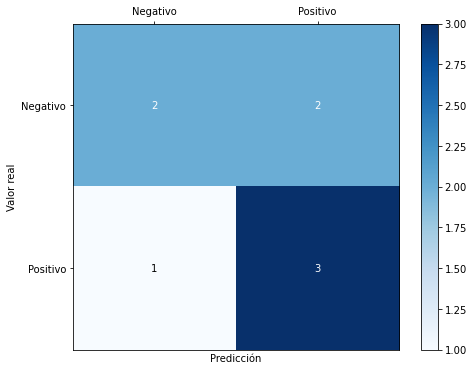

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Datos de ejemplo
y_true = np.array([1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 1])

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión como un heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo'],
       yticklabels=['Negativo', 'Positivo'],
       xlabel='Predicción',
       ylabel='Valor real')
ax.set_ylim([1.5, -0.5])
ax.xaxis.tick_top()

# Anotar los valores de la matriz de confusión en los cuadros
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


En la matriz de confusión, los verdaderos positivos se encuentran en la esquina superior izquierda, los verdaderos negativos en la esquina inferior derecha, los falsos positivos en la columna derecha y los falsos negativos en la fila superior. La diagonal de la matriz representa los valores correctamente clasificados, mientras que los valores fuera de la diagonal representan los valores incorrectamente clasificados.

## **Umbral de clasificación**

El umbral de clasificación es un valor numérico utilizado en modelos de clasificación binaria para separar las clases. El valor del umbral determina si un punto de datos se clasifica en una clase o en la otra.

Por ejemplo, en un modelo de clasificación binaria en el que se está intentando predecir si un correo electrónico es spam o no, el umbral de clasificación determinaría el nivel de probabilidad de que el correo electrónico sea spam. Si el umbral de clasificación es alto, solo se clasificarían los correos electrónicos que tienen una alta probabilidad de ser spam. Si el umbral de clasificación es bajo, se clasificarían más correos electrónicos como spam, incluidos los que tienen una menor probabilidad de serlo.

El umbral de clasificación se puede ajustar para mejorar la precisión del modelo o para adaptarse a las necesidades específicas del problema de clasificación.

![Umbral](../imagenes%20Machine_Learning/umbral.jpg "Umbral")

Matriz de confusión:
 [[462  39]
 [ 58 441]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       501
           1       0.92      0.88      0.90       499

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



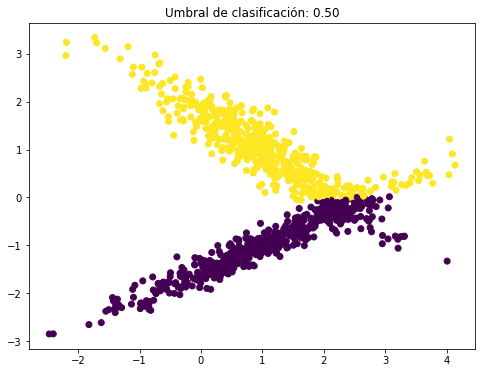

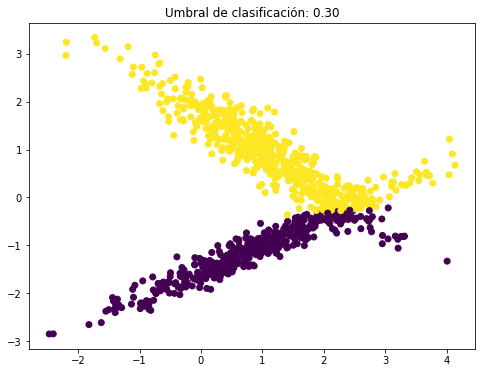

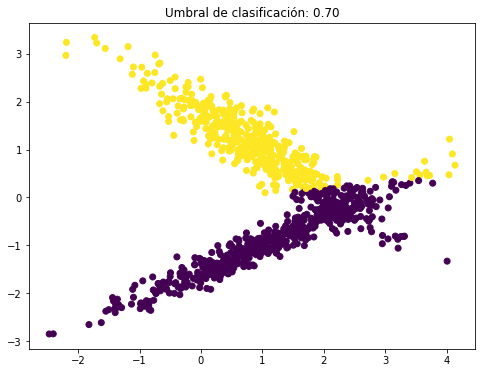

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Generamos un conjunto de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Instanciamos el modelo de regresión logística
lr = LogisticRegression()

# Ajustamos el modelo a los datos de entrenamiento
lr.fit(X, y)

# Hacemos las predicciones para los datos de entrenamiento
y_pred = lr.predict(X)
y_prob = lr.predict_proba(X)[:, 1]

# Creamos la matriz de confusión
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión:\n", cm)

# Imprimimos el reporte de clasificación
cr = classification_report(y, y_pred)
print("Reporte de clasificación:\n", cr)

# Creamos una función para visualizar el umbral de clasificación
def plot_threshold(threshold):
    y_threshold = np.where(y_prob >= threshold, 1, 0)
    cm_threshold = confusion_matrix(y, y_threshold)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_threshold)
    plt.title("Umbral de clasificación: {:.2f}".format(threshold))
    plt.show()
    
# Visualizamos la gráfica con umbral de clasificación de 0.5
plot_threshold(0.5)

# Visualizamos la gráfica con umbral de clasificación de 0.3
plot_threshold(0.3)

# Visualizamos la gráfica con umbral de clasificación de 0.7
plot_threshold(0.7)


Este código genera un conjunto de datos sintéticos, ajusta un modelo de regresión logística, hace predicciones para los datos de entrenamiento y crea una matriz de confusión y un reporte de clasificación. También crea una función para visualizar el umbral de clasificación y luego visualiza tres gráficas diferentes con diferentes umbrales de clasificación.

## **Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos**

La tasa de verdaderos positivos (True Positive Rate, TPR) y la tasa de falsos positivos (False Positive Rate, FPR) son medidas utilizadas en la evaluación del rendimiento de los modelos de clasificación binaria.

La `TPR` mide la proporción de casos positivos que se clasificaron correctamente como positivos en relación al total de casos positivos en el conjunto de datos. En otras palabras, es la probabilidad de que un ejemplo positivo sea correctamente identificado como positivo por el modelo. Se calcula de la siguiente manera:

```TPR = TP / (TP + FN)```

Donde `TP` son los verdaderos positivos y `FN` son los falsos negativos.

Por otro lado, la `FPR` mide la proporción de casos negativos que se clasificaron incorrectamente como positivos en relación al total de casos negativos en el conjunto de datos. En otras palabras, es la probabilidad de que un ejemplo negativo sea incorrectamente identificado como positivo por el modelo. Se calcula de la siguiente manera:

```FPR = FP / (FP + TN)```

Donde `FP` son los falsos positivos y `TN` son los verdaderos negativos.

Ambas tasas son importantes en la evaluación del rendimiento del modelo, ya que proporcionan información sobre la precisión y la capacidad del modelo para distinguir entre las dos clases. Un modelo ideal tendría una `TPR` de `1` y una `FPR` de `0`. Sin embargo, en la práctica, existe un compromiso entre la `TPR` y la `FPR`, y se utilizan otras medidas como la curva ROC para evaluar el rendimiento del modelo en diferentes umbrales de clasificación.

Aquí te muestro un ejemplo de cómo calcular y graficar la tasa de verdaderos positivos `(TPR)` y la tasa de falsos positivos `(FPR)` utilizando `Scikit-learn`:

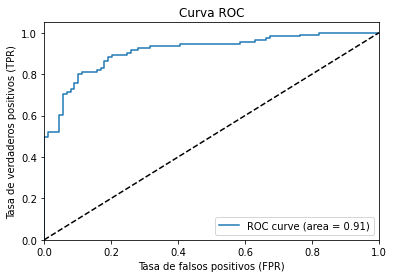

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generar datos de clasificación aleatorios
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de clasificación
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Obtener las probabilidades de predicción para el conjunto de prueba
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
tpr_score = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % tpr_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Este código genera datos de clasificación aleatorios utilizando la función ```make_classification``` de `Scikit-learn`, entrena un modelo de regresión logística y calcula la tasa de verdaderos positivos `(TPR)` y la tasa de falsos positivos `(FPR)` utilizando la función ```roc_curve``` de `Scikit-learn`. Luego, grafica la curva ROC utilizando la función `plot` de `Matplotlib`.

La curva ROC es una herramienta útil para evaluar el rendimiento de un modelo de clasificación binario en diferentes umbrales de probabilidad de predicción. La tasa de verdaderos positivos `(TPR)` y la tasa de falsos positivos `(FPR)` son dos medidas importantes de rendimiento de un modelo de clasificación binario. La `TPR` mide la proporción de positivos que se identifican correctamente, mientras que la `FPR` mide la proporción de negativos que se identifican incorrectamente como positivos.

## **Construcción de la Curva ROC**

La construcción de la Curva ROC (Receiver Operating Characteristic) es una técnica utilizada para evaluar la calidad de un modelo de clasificación binario en función del umbral de clasificación. La curva ROC es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos `(TPR)` y la tasa de falsos positivos `(FPR)` a medida que se varía el umbral de clasificación.

En la construcción de la curva ROC, se calculan las `TPR` y `FPR` para cada posible umbral de clasificación del modelo. Luego, se trazan los valores `TPR` en el eje `y` y los valores `FPR` en el eje `x`, y se dibuja una línea entre `(0,0)` y `(1,1)`. El punto `(0,0)` representa la tasa de `FPR` y `TPR` cuando el umbral de clasificación es máximo, lo que significa que todos los casos se clasifican como negativos. El punto `(1,1)` representa la tasa de `FPR` y `TPR` cuando el umbral de clasificación es mínimo, lo que significa que todos los casos se clasifican como positivos.

Una curva ROC ideal se acercaría lo más posible a la esquina superior izquierda del gráfico, lo que indica una alta `TPR` y una baja `FPR`. La calidad del modelo se puede evaluar según el área bajo la curva ROC `(AUC)`, donde un `AUC` de `1.0` representa un modelo perfecto y un `AUC` de `0.5` representa un modelo aleatorio.

La curva ROC es útil para comparar diferentes modelos y seleccionar el mejor umbral de clasificación según las necesidades específicas del problema. También es útil en situaciones en las que el costo de un falso positivo es diferente del costo de un falso negativo.

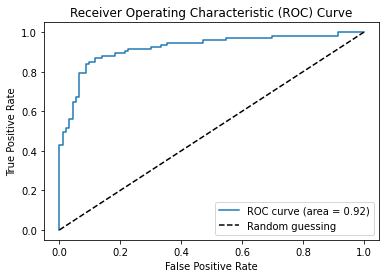

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear conjunto de datos sintéticos
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Obtener las probabilidades de la clase positiva para el conjunto de prueba
y_scores = clf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


En este ejemplo, se genera un conjunto de datos sintéticos utilizando la función ```make_classification()``` de `scikit-learn`. Luego, se divide en conjuntos de entrenamiento y prueba utilizando ```train_test_split()```. Se entrena un modelo de regresión logística utilizando los datos de entrenamiento y se utilizan las probabilidades de la clase positiva para calcular la curva `ROC` y el `AUC`. Finalmente, se grafica la curva `ROC` utilizando la función ```roc_curve()``` y se muestra en una gráfica utilizando la biblioteca ```matplotlib```.

## **Área bajo la curva ROC**

El Área Bajo la Curva ROC (Receiver Operating Characteristic) es una métrica que se utiliza para evaluar la capacidad discriminativa de un modelo de clasificación binaria. La curva ROC es una representación gráfica de la tasa de verdaderos positivos `(sensibilidad)` frente a la tasa de falsos positivos `(1 - especificidad)` a diferentes umbrales de clasificación. El área bajo la curva ROC `(AUC-ROC)` mide la capacidad del modelo para distinguir entre las dos clases y se utiliza para comparar la eficacia de diferentes modelos. Un `AUC-ROC` de `0,5` significa que el modelo es igual que una clasificación aleatoria, mientras que un `AUC-ROC` de `1,0` indica que el modelo es perfecto.

![area bajo la curva](../imagenes%20Machine_Learning/area%20bajo%20la%20curva.webp "area bajo la curva")

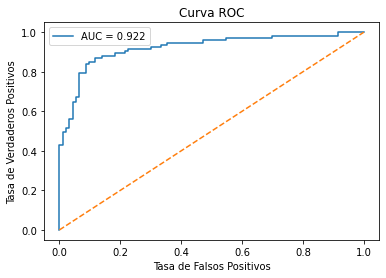

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generamos un conjunto de datos sintéticos
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo de regresión logística y lo entrenamos
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtenemos las probabilidades de las predicciones en el conjunto de prueba
y_probs = model.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculamos el área bajo la curva ROC
auc = roc_auc_score(y_test, y_probs)

# Graficamos la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


Este código generará una gráfica de la curva `ROC` y mostrará el valor del área bajo la curva ROC `(AUC)` en la etiqueta de leyenda.

| **Inicio** | **atrás 11** | **Siguiente 13** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./11.Perceptron.ipynb)| [⏩](./13.Arboles%20_Decision.ipynb)|